In [14]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import collections

In [3]:
import utils as ut

In [4]:
df = ut.data1()

no of rows:  (124494, 12)
Index(['d', 'm', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
after date aggregation per day:  (304, 11)
after event aggregation :  (282, 11)


In [31]:
fc = ut.allcols()
dm = df[fc]

x = dm.to_numpy()
y = df['e'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.30)

In [32]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.775 (0.065)


In [33]:
X_train.shape, y_train.shape

((197, 9), (197,))

In [15]:
collections.Counter(y_train)

Counter({0: 156, 1: 41})

In [16]:
collections.Counter(y_test)

Counter({0: 72, 1: 13})

## confusion matrix for a model with all feature vectors

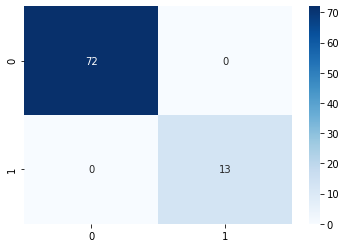

In [10]:
model.fit(X_test, y_test)
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

<hr>

In [45]:
fc = ut.allcols()
dm = df[['1','2']]

x = dm.to_numpy()
y = df['e'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.30)

In [46]:
collections.Counter(y_train)

Counter({0: 162, 1: 35})

In [47]:
collections.Counter(y_test)

Counter({0: 66, 1: 19})

In [48]:
X_train.shape, y_train.shape

((197, 2), (197,))

In [42]:
X_train = X_train.reshape((-1,1))

In [43]:
X_train[0:5]

array([[0.00010432],
       [0.00196623],
       [0.00517991],
       [0.00519229],
       [0.00415524]])

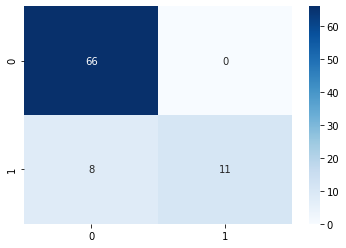

In [49]:
model.fit(X_test, y_test)
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

<br>

In [51]:
fc = ut.allcols()
dm = df[['1']]

x = dm.to_numpy()
y = df['e'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.30)

In [52]:
collections.Counter(y_train)

Counter({0: 156, 1: 41})

In [53]:
collections.Counter(y_test)

Counter({0: 72, 1: 13})

In [54]:
X_train.shape, y_train.shape

((197, 1), (197,))

In [57]:
collections.Counter(y_train)

Counter({0: 156, 1: 41})

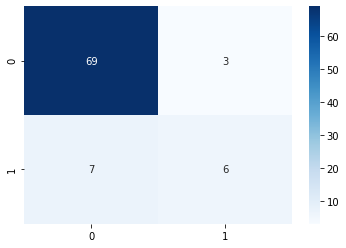

In [55]:
model.fit(X_test, y_test)
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [58]:
cf_matrix

array([[69,  3],
       [ 7,  6]])

<hr>

In [88]:
def prcfm(cfm):
    
    res = {}
    res['00'] = cfm[0,0]
    res['01'] = cfm[0,1]
    res['10'] = cfm[1,0]
    res['11'] = cfm[1,1]
    
    return res


def getcfm(fv):
    fc = ut.allcols()
    dm = df[[str(fv)]]

    x = dm.to_numpy()
    y = df['e'].to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test,y_pred)
    return cf_matrix 

#ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [139]:
rs = []
for e in range(1,10):
    cfm = getcfm(e).flatten()
    rs.append(cfm)
    
rs = np.array(rs)

### all elements of confusion matrix, per feature vector for all the 9 sets

some off diagonal elements do exist

Text(0.5, 1.0, '0:true pos, 3: true nev, {2,4}: off-diagonal in cfm')

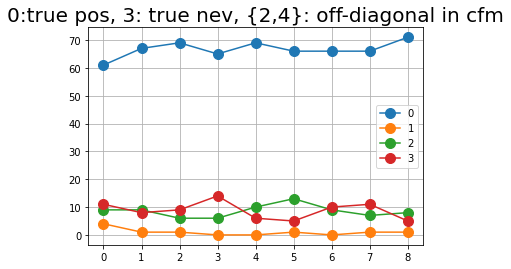

In [154]:
l = []
for e in range(0,4): 
    plt.plot(rs[:,e], marker='o', markersize=10)
    l.append(str(e))

plt.legend(l)
plt.grid()
plt.title('0:true pos, 3: true nev, {2,4}: off-diagonal in cfm',fontsize=20)

### True {positive, and negative} per feature vector

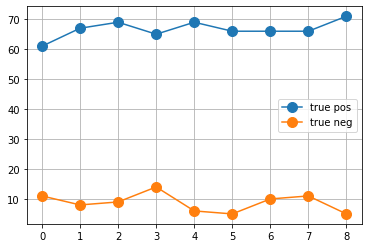

In [151]:
l = []
plt.plot(rs[:,0], marker='o', markersize=10)
l.append('true pos')
plt.plot(rs[:,3], marker='o', markersize=10)
l.append('true neg')
plt.grid()
plt.legend(l)